Missing values in the dataset:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64


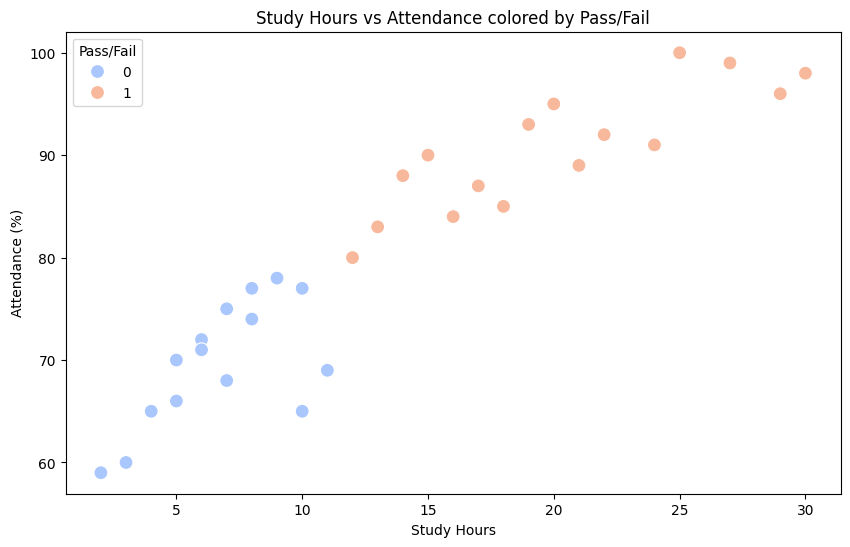

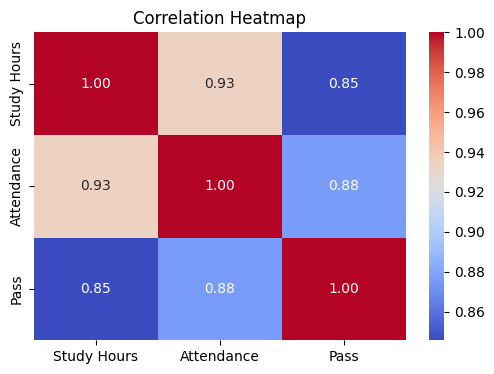

Accuracy of the model: 1.00


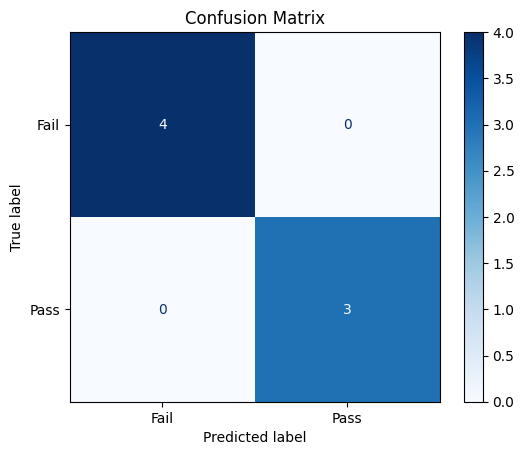

Coefficients (Study Hours, Attendance): [[1.40649256 1.55102131]]
Attendance has a stronger influence on passing/failing than Study Hours.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Expanded Dataset creation
# Increase dataset size by generating more values
data = {
    'Study Hours': [15, 5, 12, 3, 20, 7, 18, 10, 25, 8, 14, 6, 13, 2, 22, 9, 17, 11, 30, 5,
                    19, 6, 16, 8, 27, 4, 24, 3, 21, 10, 29, 7],
    'Attendance': [90, 70, 80, 60, 95, 75, 85, 65, 100, 77, 88, 72, 83, 59, 92, 78, 87, 69, 98, 66,
                   93, 71, 84, 74, 99, 65, 91, 60, 89, 77, 96, 68],
    'Pass': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 
             1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

# Create a DataFrame with more data
df = pd.DataFrame(data)

# Step 2: Data Exploration
# 2.1 Check for missing values
print("Missing values in the dataset:\n", df.isnull().sum())

# 2.2 Visualizing the relationships
# Scatter plot between Study Hours and Attendance, colored by Pass/Fail status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study Hours', y='Attendance', hue='Pass', data=df, palette='coolwarm', s=100)
plt.title('Study Hours vs Attendance colored by Pass/Fail')
plt.xlabel('Study Hours')
plt.ylabel('Attendance (%)')
plt.legend(title="Pass/Fail")
plt.show()

# 2.3 Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Prepare data for model training
# 3.1 Split the dataset into features and target variable
X = df[['Study Hours', 'Attendance']]  # Features
y = df['Pass']  # Target variable

# 3.2 Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.3 Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Model Training
# 4.1 Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Model Evaluation
# 5.1 Predict on the test set
y_pred = model.predict(X_test_scaled)

# 5.2 Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# 5.3 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['Fail', 'Pass'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Insights
# 6.1 Print coefficients (to get insights into feature importance)
print(f"Coefficients (Study Hours, Attendance): {model.coef_}")

# 6.2 Interpret the insights
if model.coef_[0][0] > model.coef_[0][1]:
    print("Study Hours have a stronger influence on passing/failing than Attendance.")
else:
    print("Attendance has a stronger influence on passing/failing than Study Hours.")


Columns in DataFrame: Index(['review_text', 'sentiment'], dtype='object')
sentiment
positive    63
negative    63
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


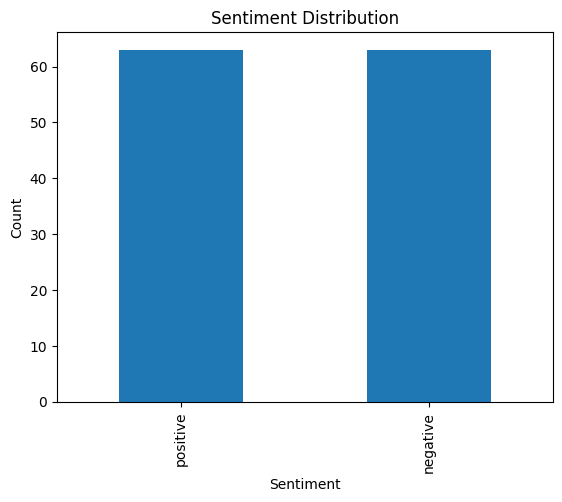

Random Forest Accuracy: 0.92
Random Forest Precision: 0.93
Random Forest Recall: 0.93
Random Forest F1-Score: 0.93

Examples of correctly classified reviews (Random Forest):
Review: Never buying from here again. | Sentiment: negative | Prediction: negative
Review: Poor customer service, not helpful at all. | Sentiment: negative | Prediction: negative
Review: Awesome quality, very happy with it! | Sentiment: positive | Prediction: positive
Review: Terrible service and poor quality. | Sentiment: negative | Prediction: negative
Review: Very happy with my purchase, great value. | Sentiment: positive | Prediction: positive
Review: Very poor performance, regret buying. | Sentiment: negative | Prediction: negative
Review: Very bad quality, wouldn’t recommend. | Sentiment: negative | Prediction: negative
Review: Returned it immediately, worst quality. | Sentiment: negative | Prediction: negative
Review: Very low quality, would not buy again. | Sentiment: positive | Prediction: positive
Review:

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\dell\Downloads\reviews.csv')

# Check column names
print("Columns in DataFrame:", df.columns)

# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Ensure 'review_text' and 'sentiment' columns are present
if 'review_text' not in df.columns or 'sentiment' not in df.columns:
    print("Error: 'review_text' or 'sentiment' column not found in DataFrame")
else:
    # Download necessary NLTK data
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')

    # Preprocessing function
    def preprocess_text(text):
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text.lower())
        words = [WordNetLemmatizer().lemmatize(w) for w in word_tokens if w not in stop_words and w.isalnum()]
        return ' '.join(words)

    # Apply preprocessing
    df['cleaned_review'] = df['review_text'].apply(preprocess_text)

    # Check the distribution of sentiments
    print(df['sentiment'].value_counts())

    # Plot the distribution of sentiments
    df['sentiment'].value_counts().plot(kind='bar')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    # Text vectorization using TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['cleaned_review'])
    y = df['sentiment']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest model
    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train, y_train)

    # Make predictions
    y_pred_rf = model_rf.predict(X_test)

    # Evaluate the model
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, pos_label='positive')
    recall_rf = recall_score(y_test, y_pred_rf, pos_label='positive', zero_division=0)
    f1_rf = f1_score(y_test, y_pred_rf, pos_label='positive')

    # Print the evaluation results
    print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
    print(f"Random Forest Precision: {precision_rf:.2f}")
    print(f"Random Forest Recall: {recall_rf:.2f}")
    print(f"Random Forest F1-Score: {f1_rf:.2f}")

    # Insights
    correct_indices_rf = (y_test == y_pred_rf)
    incorrect_indices_rf = (y_test != y_pred_rf)

    print("\nExamples of correctly classified reviews (Random Forest):")
    for review, sentiment, prediction in zip(df['review_text'].iloc[correct_indices_rf.index], y_test[correct_indices_rf], y_pred_rf[correct_indices_rf]):
        print(f"Review: {review} | Sentiment: {sentiment} | Prediction: {prediction}")

    print("\nExamples of incorrectly classified reviews (Random Forest):")
    for review, sentiment, prediction in zip(df['review_text'].iloc[incorrect_indices_rf.index], y_test[incorrect_indices_rf], y_pred_rf[incorrect_indices_rf]):
        print(f"Review: {review} | Sentiment: {sentiment} | Prediction: {prediction}")
